# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1:</center>
### <center>  Propiedades en Venta</center>
### <center>  Grupo 18</center>


#### **Integrantes:**

* Analía Acevedo
* Santiago Daniel Marczewski Neudeck
* Lucia Belén Napoli
* Brayan Ricaldi

#### **Introducción**

En este trabajo práctico se propone que cada grupo de alumnos se enfrente a un problema real
de ciencia de datos, que trabaje en cada una de las etapas del proceso y que pueda resolverlo
aplicando los contenidos que vemos en la materia.

Vamos a utilizar el conjunto de datos provisto por la empresa [Properati](https://www.properati.com.ar/) correspondiente a anuncios de propiedades en venta de la República Argentina publicados durante el año 2021 .
La información fue extraída desde BigQuery (producto de Google Cloud para consultar grandes
volúmenes de datos) donde la empresa disponibiliza sus datasets con avisos de propiedades y
desarrollos inmobiliarios que están y estuvieron publicados en Properati en todo Latinoamérica
desde 2015 hasta dos meses atrás. Los datos se actualizan diariamente para mayor información
pueden consultar el siguiente [link](https://www.properati.com.ar/data/).

El objetivo principal del trabajo será aplicar técnicas de análisis exploratorio, preprocesamiento
de datos, agrupamiento, clasificación y regresión. En la sección enunciado se detallan los
objetivos particulares.

#### **Descargamos en DataSet**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://drive.google.com/file/d/1wScqb_M8lq3yL3ZfSZvnLyZbh4ImI7dI/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
dp_properity = pd.read_csv(url)

In [3]:
df = dp_properity.copy()

In [4]:
df.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488716,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


In [5]:
df.shape

(460154, 20)

#### **Enunciado**
El conjunto de datos a utilizar properati_argentina_2021 se encuentra disponible en el
siguiente [enlace](https://drive.google.com/drive/folders/1BPCdW_Jab91WhMqfXcf0jYMHzjxW_XkD?usp=sharing), la descripción de las variables se encuentra disponible [aquí](https://www.properati.com.ar/data/). Para este trabajo
se plantean los siguientes objetivos generales:

* _Agrupamiento_: el objetivo será analizar si es posible agrupar los datos en función de
algún criterio, identificando a qué obedece el mismo.

* _Clasificación_: el objetivo será clasificar cada anuncio en tres categorías relacionadas al
precio de venta (alto, medio y bajo).

* _Regresión_: el objetivo será predecir el precio de venta en dólares de una propiedad tipo
vivienda ubicada en Capital Federal.

A continuación se detallan las etapas que deben ser desarrolladas en el trabajo:

### **1. Análisis Exploratorio y Preprocesamiento de Datos**
El primer paso consiste en la selección de los datos que se van a utilizar, se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).
Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

**a) Exploración Inicial:** analizar cada variable, considerando los siguientes aspectos
* Tipo de variable
* Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1,
q3, moda.
* Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada
uno.
* Determinar variables irrelevantes en el análisis (Ids por ejemplo)
* Realizar un análisis gráfico de las distribuciones de las variables
* Analizar las correlaciones existentes entre las variables.

A partir de este análisis generar conclusiones sobre los datos.



<h4 align="center"><b> Tipo de variable </b></h4>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

In [7]:
dic = {'object':0,  'float': 0}
f_float = []
f_object = []

for f in dp_properity.columns:
    if df[f].dtype == 'O': 
        f_object.append(f)
        dic['object'] = dic.get('object', 0) + 1 
    if df[f].dtype == 'float': 
        f_float.append(f)
        dic['float'] = dic.get('float', 0) + 1
    
df_type = pd.DataFrame()
df_type['Type'] = None
for key in dic:
    df_type.loc[key] = [dic[key]]

In [8]:
df_type

,Type
object,12
float,8


Se observa que hay 12 variables string y 8 float

<h3 align="center"><b> Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1,
q3, moda. </b></h3>

In [9]:
df.describe()

,latitud,longitud,place_l6,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,419740.000000,419740.000000,0.0,368498.000000,344113.000000,397813.000000,4.279160e+05,4.421530e+05
mean,-34.228570,-59.557066,NaN,3.278053,2.297960,420.601250,9.605005e+03,3.063273e+05
std,3.251509,2.905129,NaN,1.870832,1.673985,4026.380748,3.440367e+06,4.899613e+06
min,-54.832057,-103.219258,NaN,1.000000,-3.000000,-1.000000,-3.000000e+00,0.000000e+00
25%,-34.640132,-58.899343,NaN,2.000000,1.000000,50.000000,4.500000e+01,4.490000e+04
50%,-34.585122,-58.488309,NaN,3.000000,2.000000,90.000000,7.800000e+01,9.800000e+04
75%,-34.423414,-58.404876,NaN,4.000000,3.000000,210.000000,1.700000e+02,1.990000e+05
max,42.557773,-35.044991,NaN,40.000000,390.000000,200000.000000,2.147484e+09,1.500000e+09


In [10]:
df[f_float].mode()

,latitud,longitud,place_l6,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,-34.407182,-58.650749,NaN,3.0,2.0,40.0,40.0,120000.0


<h3 align="center"><b> Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada
uno </b></h3>

### Tipo de operacion: Venta, Alquiler, Alquiler temporal

In [11]:
print('Cantidad de elementos nulos = ', df['operation'].isnull().sum())
print('Cantidad de elementos no nulos = ', (df['operation'].value_counts().sum() - df['operation'].isnull().sum()))
df['operation'].value_counts()

Cantidad de elementos nulos =  0
Cantidad de elementos no nulos =  460154


Venta                337874
Alquiler              98900
Alquiler temporal     23380
Name: operation, dtype: int64

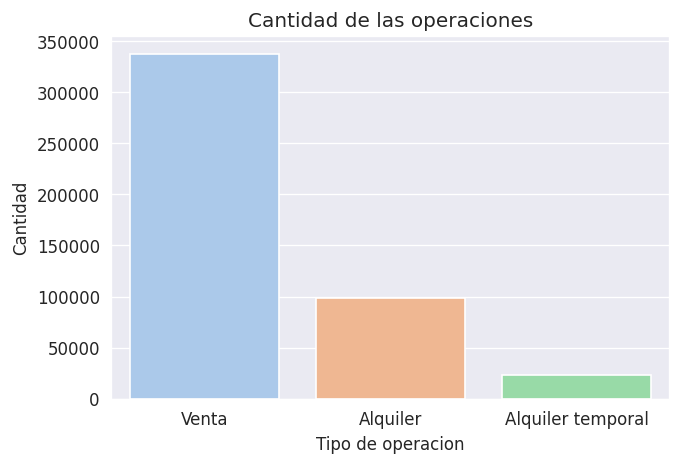

In [12]:
plt.figure(dpi=120)
sns.set_style("darkgrid")
colors = sns.color_palette('pastel')
sns.countplot(x= 'operation', data=df, palette=colors)
plt.ylabel("Cantidad")
plt.xlabel("Tipo de operacion")
plt.title("Cantidad de las operaciones")
plt.show()

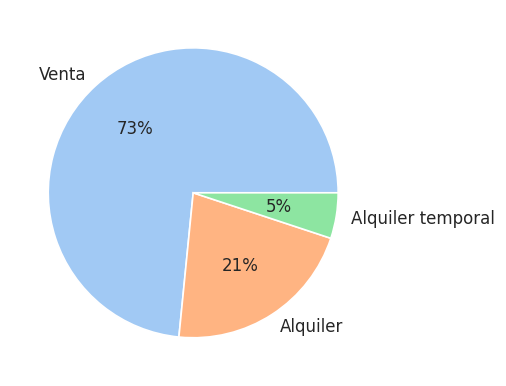

In [13]:
plt.figure(dpi=120)
data = df['operation'].value_counts()
labels = df['operation'].value_counts().index
colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

+ La operación que se realiza en mayor cantidad es la venta de propiedades, que corresponde a un 73% de los datos del dataset.

### Tipo de propiedad (Casa, Departamento, PH)

In [14]:
print('Cantidad de elementos nulos = ', df['property_type'].isnull().sum())
print('Cantidad de elementos no nulos = ', (df['property_type'].value_counts().sum() - df['property_type'].isnull().sum()))
df['property_type'].value_counts()

Cantidad de elementos nulos =  0
Cantidad de elementos no nulos =  460154


Departamento       231358
Casa               120768
Lote                28748
PH                  25910
Local comercial     20546
Oficina             16085
Otro                 7713
Cochera              4111
Depósito             4050
Casa de campo         865
Name: property_type, dtype: int64

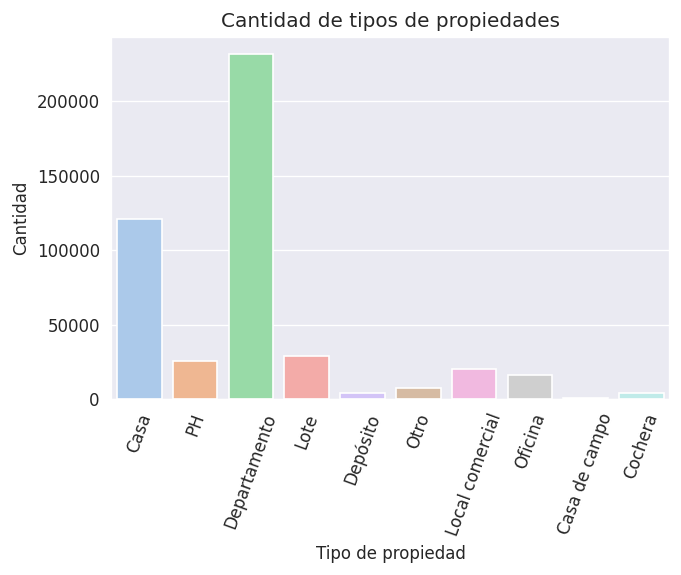

In [15]:
plt.figure(dpi=120)
colors = sns.color_palette('pastel')
sns.countplot(x= 'property_type', data=df, palette=colors)
plt.ylabel("Cantidad")
plt.xlabel("Tipo de propiedad")
plt.xticks(rotation=70)
plt.title("Cantidad de tipos de propiedades")
plt.show()

In [16]:
def my_autopct(pct):
    return ('%.1f%%' % pct) if pct > 2 else ''

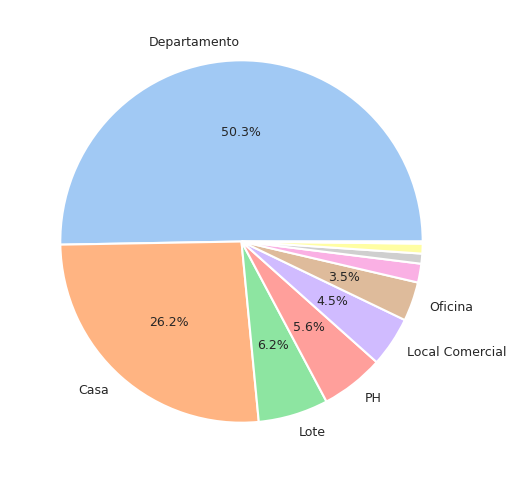

In [17]:
plt.figure(dpi=150)
data = df['property_type'].value_counts()
labels = ['Departamento', 'Casa', 'Lote','PH','Local Comercial','Oficina','','','','']
#labels = df['property_type'].value_counts().index
colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct=my_autopct, textprops={'fontsize': 6})
plt.show()

+ Hago un acercamiento de los datos de los tipos de propiedades que vamos a analizar

In [18]:
df_type = df.loc[(df['property_type']=='Casa') | (df['property_type']=='PH') | (df['property_type']=='Departamento')]

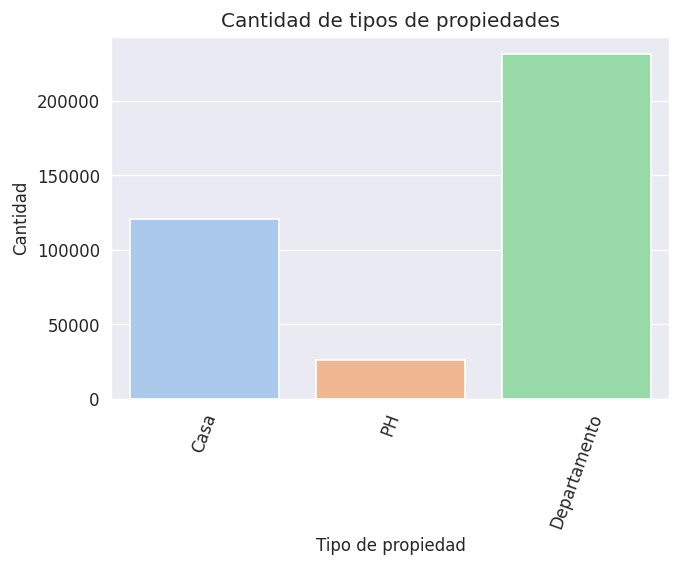

In [19]:
plt.figure(dpi=120)
colors = sns.color_palette('pastel')
sns.countplot(x= 'property_type', data=df_type, palette=colors)
plt.ylabel("Cantidad")
plt.xlabel("Tipo de propiedad")
plt.xticks(rotation=70)
plt.title("Cantidad de tipos de propiedades")
plt.show()

+ Departamento es el tipo de propiedad que mas aparece en el dataset.
+ Casa aparece aproximadamente la mitad de veces que departamento.

### Moneda del precio publicado

In [20]:
print('Cantidad de elementos nulos = ', df['property_currency'].isnull().sum())
print('Cantidad de elementos no nulos = ', (df['property_currency'].value_counts().sum() - df['property_currency'].isnull().sum()))
df['property_currency'].value_counts()

Cantidad de elementos nulos =  18564
Cantidad de elementos no nulos =  423026


USD    349104
ARS     88869
UYU      3506
PEN        99
COP        12
Name: property_currency, dtype: int64

+ USD: dolar estadounidense
+ ARS: peso argentino
+ UYU: peso uruguayo
+ PEN: sol peruano
+ COP: peso colombiano

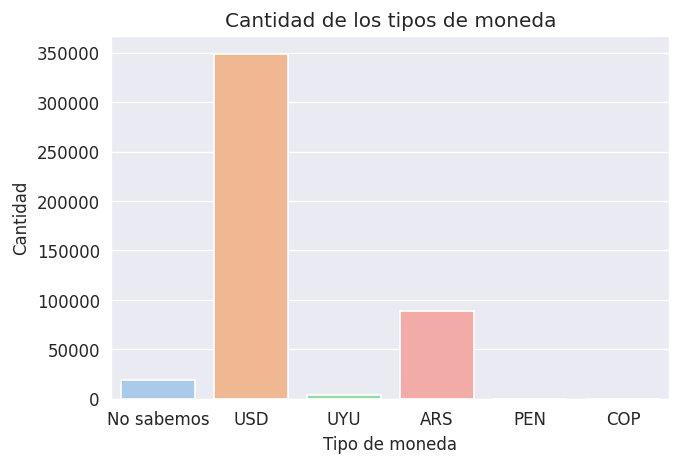

In [21]:
plt.figure(dpi=120)
sns.countplot(x= 'property_currency', data=df.fillna('No sabemos'), palette=colors)
plt.ylabel("Cantidad")
plt.xlabel("Tipo de moneda")
plt.title("Cantidad de los tipos de moneda")
plt.show()

+ Hay una cantidad muy chica de datos que no sabemos que tipo de moneda son

In [22]:
def my_autopct(pct):
    return ('%.0f%%' % pct) if pct > 15 else ''

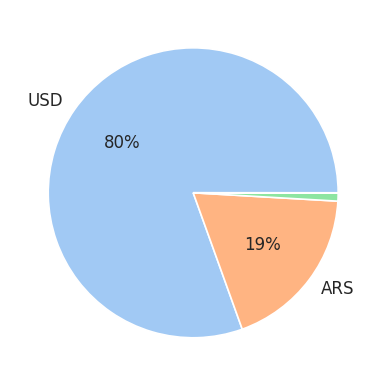

In [23]:
plt.figure(dpi=120)
data = df_type['property_currency'].value_counts()
labels = ['USD', 'ARS','','','']
colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct=my_autopct)
plt.show()

+ El 80% de los datos corresponde a la moneda dolar, el 19% a pesos argentinos y el resto en un porcentaje muy pequeño corresponde a los otros tipos de monedas.

<h3 align="center"><b> Determinar variables irrelevantes en el análisis </b></h3>

Se eliminara el feature Id y place_l6.
Las razones:
* Id: Por ser irrelevante
*  Place_l6: Por solo tener valores nan

In [24]:
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(f"Porcentaje de nan de place_l6: { na_ratio.place_l6}")

Porcentaje de nan de place_l6: 100.0


In [25]:
df.drop(columns = ['place_l6', 'id'], inplace=True) 

# Selección
El primer paso consiste en la selección de los datos que se van a utilizar, se deben filtrar únicamente los anuncios de propiedades con las siguientes caracteristicas:
+ Tipo vivienda: Casa, PH y Departamento
+ Ubicacion: Capital Federal
+ Tipo de operación: venta
+ Moneda: dólares (USD)

In [26]:
df_seleccion = df.loc[((df['property_type']=='Casa') | (df['property_type']=='PH') | (df['property_type']=='Departamento')) &
                     (df['place_l2']=='Capital Federal') & (df['operation']=='Venta') & (df['property_currency']=='USD')]
df_seleccion.head()

,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
25,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
49,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
51,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,NaN,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


In [27]:
df_seleccion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94249 entries, 25 to 460090
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   start_date                94249 non-null  object 
 1   end_date                  94249 non-null  object 
 2   created_on                94249 non-null  object 
 3   latitud                   90519 non-null  float64
 4   longitud                  90519 non-null  float64
 5   place_l2                  94249 non-null  object 
 6   place_l3                  93832 non-null  object 
 7   place_l4                  3643 non-null   object 
 8   place_l5                  0 non-null      object 
 9   operation                 94249 non-null  object 
 10  property_type             94249 non-null  object 
 11  property_rooms            93205 non-null  float64
 12  property_bedrooms         83262 non-null  float64
 13  property_surface_total    89405 non-null  float64
 14  prop

### Cantidad de faltantes en la seleccion

In [28]:
na_ratio_column = pd.DataFrame()
na_ratio_column["Count"] =(df_seleccion.isnull().sum()).sort_values(ascending = False)
na_ratio_column["Percent"] = ((df_seleccion.isnull().sum() / len(df_seleccion))*100).sort_values(ascending = False)

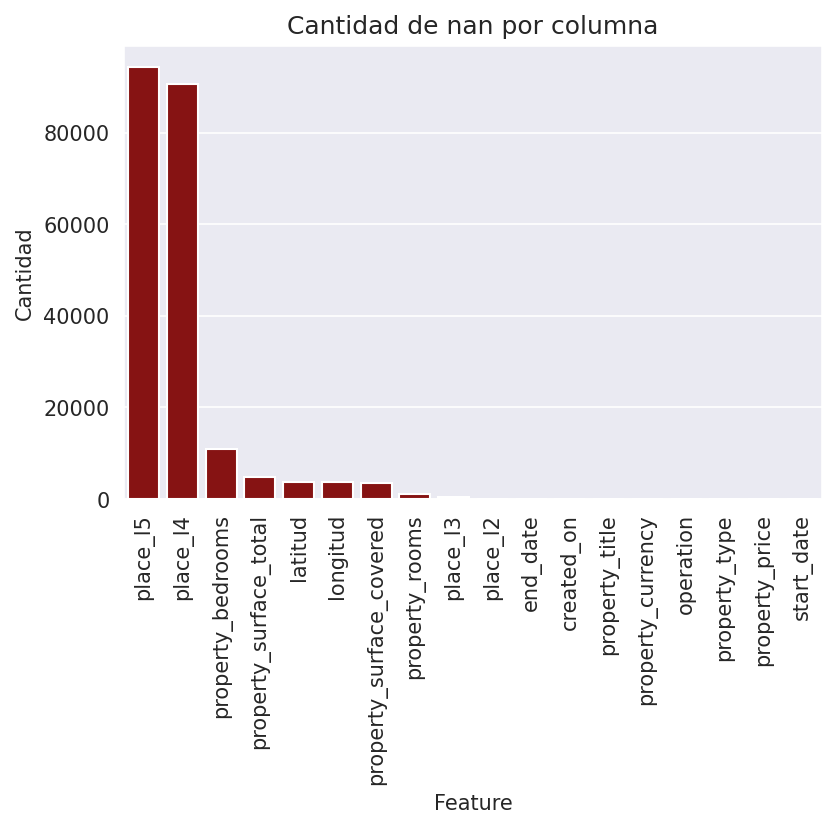

In [29]:
eje_x = na_ratio_column.index
eje_y = list(na_ratio_column['Count'])

plt.figure(dpi=150)
sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, color=(0.6, 0, 0), alpha = 1)
plt.ylabel("Cantidad")
plt.xlabel("Feature")
plt.title("Cantidad de nan por columna")
plt.xticks(rotation=90)
plt.show()

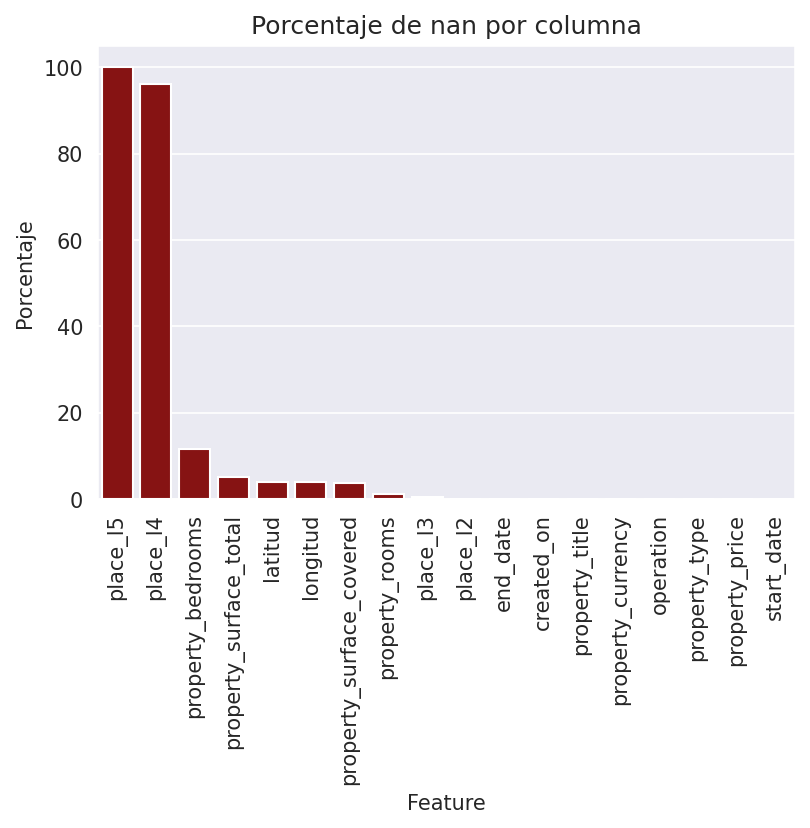

In [30]:
eje_x = na_ratio_column.index
eje_y = list(na_ratio_column['Percent'])

plt.figure(dpi=150)
sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, color=(0.6, 0, 0), alpha = 1)
plt.ylabel("Porcentaje")
plt.xlabel("Feature")
plt.title("Porcentaje de nan por columna")
plt.xticks(rotation=90)
plt.show()

In [31]:
df_seleccion = df_seleccion.drop('place_l5', axis=1)

In [32]:
df_seleccion.head()

,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
25,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
49,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
51,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


### Tipo de propiedad (Casa, Departamento, PH)

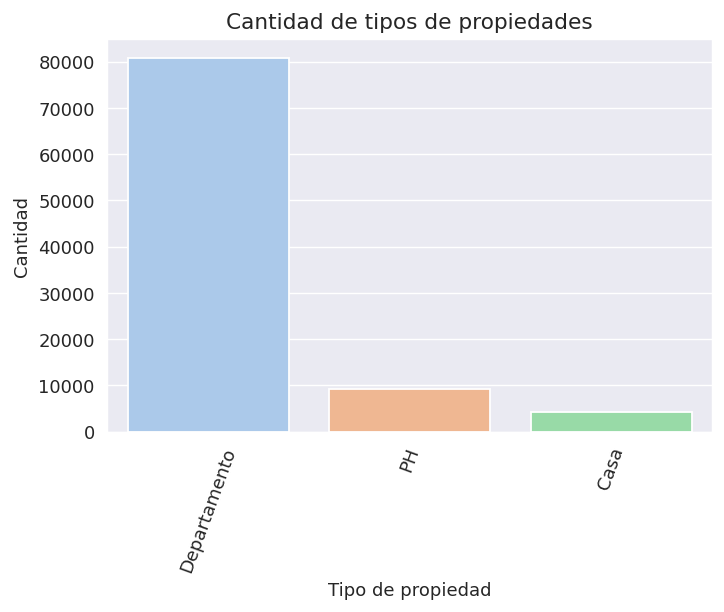

In [33]:
plt.figure(dpi=130)
colors = sns.color_palette('pastel')
sns.countplot(x= 'property_type', data=df_seleccion, palette=colors, order=df_seleccion.property_type.value_counts().index)
plt.ylabel("Cantidad")
plt.xlabel("Tipo de propiedad")
plt.xticks(rotation=70)
plt.title("Cantidad de tipos de propiedades")
plt.show()

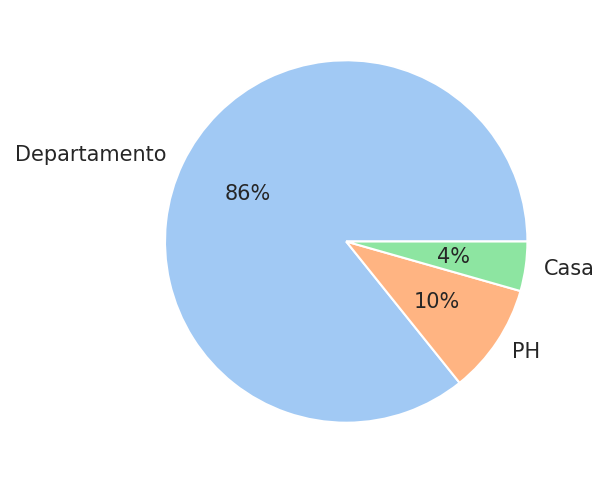

In [34]:
plt.figure(dpi=150)
data = df_seleccion['property_type'].value_counts()
labels = df_seleccion['property_type'].value_counts().index
colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

+ El 86% de los datos corresponde a una publicacion de departamento.

### Precio publicado en el anuncio

In [35]:
df_seleccion['property_price']

25        210000.0
42         82900.0
43         99000.0
49        146000.0
51        250000.0
            ...   
460072    220000.0
460073    161000.0
460074     75500.0
460075     74500.0
460090    135000.0
Name: property_price, Length: 94249, dtype: float64

In [36]:
print('Cantidad de elementos = ', df_seleccion['property_price'].size)
print('Cantidad de elementos nulos = ', df_seleccion['property_price'].isnull().sum())
print("Media = ", round(df_seleccion['property_price'].mean(),4))

Cantidad de elementos =  94249
Cantidad de elementos nulos =  0
Media =  226238.2072


### Precio segun el tipo de propiedad

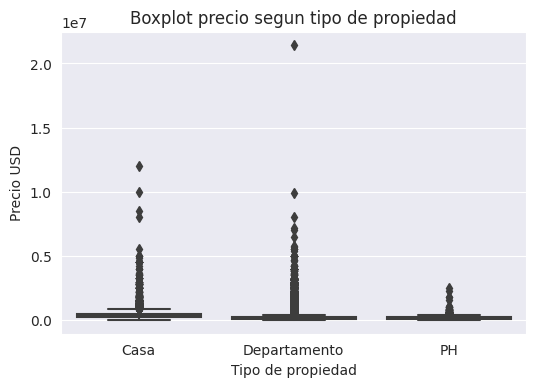

In [37]:
plt.figure(dpi=100)
sns_boxplot_price=sns.boxplot(x="property_type",y="property_price", data=df_seleccion).set(title="Boxplot precio segun tipo de propiedad",xlabel='Tipo de propiedad',ylabel='Precio USD')

+ Hay un outlier muy lejano en departamento

In [38]:
df_depto = df_seleccion[df_seleccion['property_type']=='Departamento']
df_depto[df_depto['property_price']>20000000]

,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
60073,2021-01-25,2022-05-13,2021-01-25,-34.616044,-58.458621,Capital Federal,Caballito,NaN,Venta,Departamento,3.0,NaN,68.0,64.0,21400000.0,USD,Departamento venta


+ Hay 4 outliers mas alejados en casa

In [39]:
df_casa = df_seleccion[df_seleccion['property_type']=='Casa']
df_casa[df_casa['property_price']>6000000]

,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
85725,2021-03-26,2021-06-05,2021-03-26,-34.572494,-58.462433,Capital Federal,Belgrano,NaN,Venta,Casa,5.0,4.0,3197.0,3367.0,12000000.0,USD,Casa - Belgrano R
148534,2021-05-12,2021-05-14,2021-05-12,-34.565947,-58.442326,Capital Federal,Belgrano,NaN,Venta,Casa,9.0,5.0,1763.0,1763.0,8000000.0,USD,Casa Estilo Frances en Venta y/o Alquiler | V...
156777,2021-02-17,2021-02-19,2021-02-17,-34.608300,-58.371200,Capital Federal,Monserrat,NaN,Venta,Casa,3.0,2.0,225.0,93.0,8500000.0,USD,Oportunidad al Costo! Venta Preciosa Casa a Es...
332190,2021-09-17,2022-03-09,2021-09-17,-34.593634,-58.377164,Capital Federal,Retiro,NaN,Venta,Casa,NaN,8.0,1166.0,1485.0,10000000.0,USD,Basavilbaso y Arenales Espectacular casa. Embl...


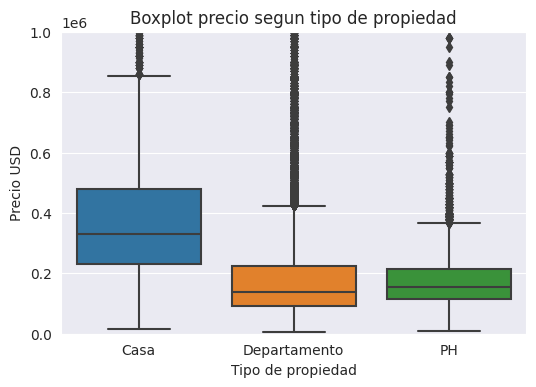

In [40]:
plt.figure(dpi=100)
sns_boxplot_price=sns.boxplot(x="property_type",y="property_price", data=df_seleccion)
sns_boxplot_price=sns_boxplot_price.set(title="Boxplot precio segun tipo de propiedad",xlabel='Tipo de propiedad',ylabel='Precio USD', ylim=(0, 1000000))

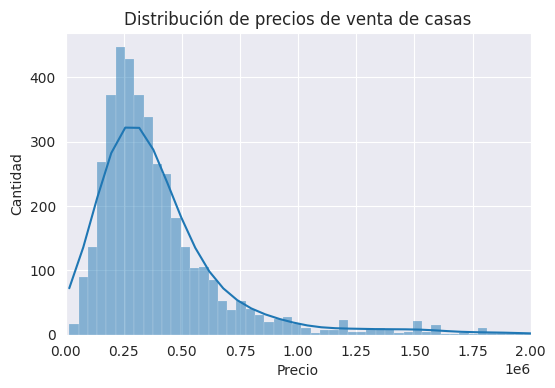

In [41]:
plt.figure(dpi=100)
h_casa = sns.histplot(df_casa['property_price'], bins=300,kde=True)
h_casa = h_casa.set(title='Distribución de precios de venta de casas', xlim=(0, 2000000), xlabel='Precio', ylabel='Cantidad')

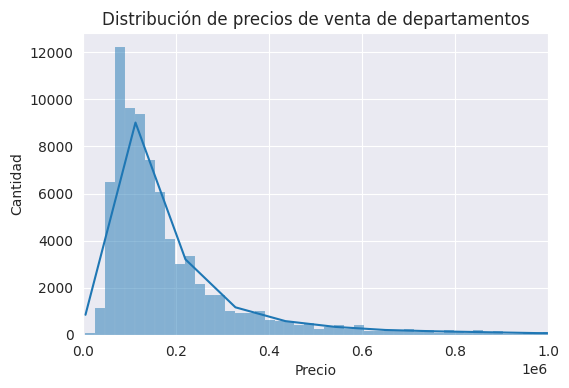

In [42]:
plt.figure(dpi=100)
h_depto = sns.histplot(df_depto['property_price'], bins=1000, kde=True)
h_depto = h_depto.set(title='Distribución de precios de venta de departamentos', xlim=(0, 1000000), xlabel='Precio', ylabel='Cantidad')

In [43]:
df_ph = df_seleccion[df_seleccion['property_type']=='PH']

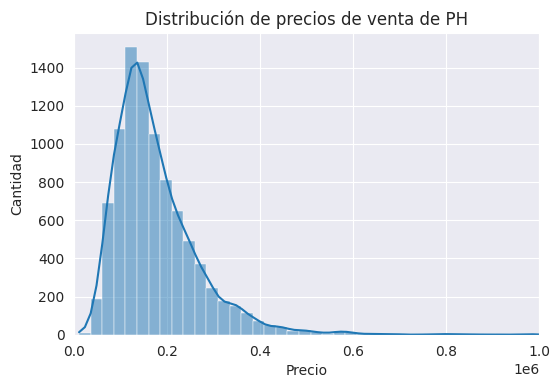

In [44]:
plt.figure(dpi=100)
h_ph = sns.histplot(df_ph['property_price'], bins=100, kde=True)
h_ph = h_ph.set(title='Distribución de precios de venta de PH', xlim=(0, 1000000), xlabel='Precio', ylabel='Cantidad')

#### Con log

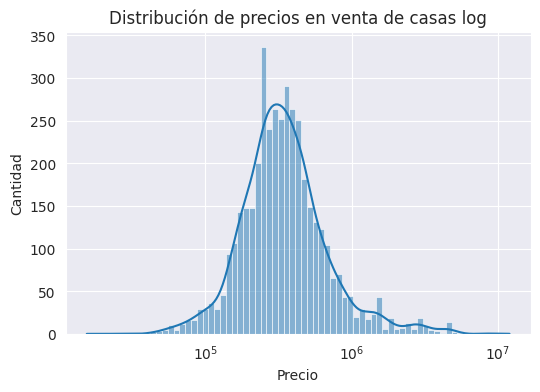

In [45]:
plt.figure(dpi=100)
h_casa2 = sns.histplot(df_casa['property_price'], kde=True, log_scale=True)
h_casa2 = h_casa2.set(title='Distribución de precios en venta de casas log', xlabel='Precio', ylabel='Cantidad')

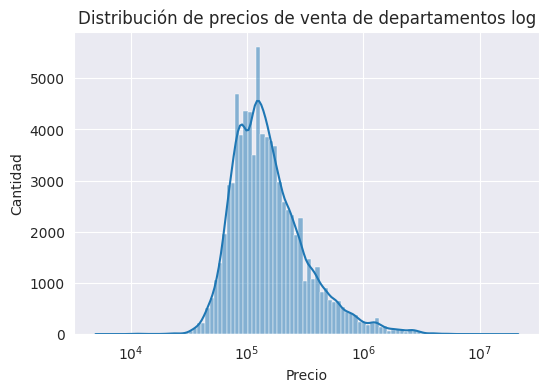

In [46]:
plt.figure(dpi=100)
h_depto2 = sns.histplot(df_depto['property_price'], bins=100, kde=True, log_scale=True)
h_depto2 = h_depto2.set(title='Distribución de precios de venta de departamentos log', xlabel='Precio', ylabel='Cantidad')

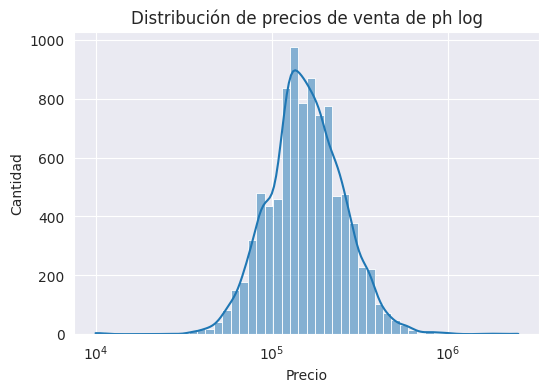

In [47]:
plt.figure(dpi=100)
h_ph2 = sns.histplot(df_ph['property_price'], bins=50, kde=True, log_scale=True)
h_ph2 = h_ph2.set(title='Distribución de precios de venta de ph log', xlabel='Precio', ylabel='Cantidad')

### Precio de venta

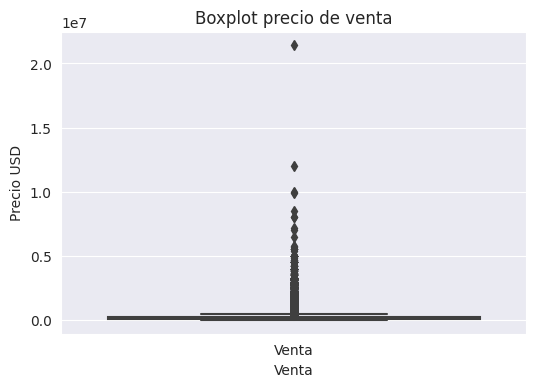

In [48]:
plt.figure(dpi=100)
sns_boxplot_price=sns.boxplot(x="operation",y="property_price", data=df_seleccion).set(title="Boxplot precio de venta",xlabel='Venta',ylabel='Precio USD')

+ Outlier

In [49]:
df_seleccion[df_seleccion['property_price']>20000000]

,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
60073,2021-01-25,2022-05-13,2021-01-25,-34.616044,-58.458621,Capital Federal,Caballito,NaN,Venta,Departamento,3.0,NaN,68.0,64.0,21400000.0,USD,Departamento venta


+ Es el mismo outlier de antes, es la venta de un departamento

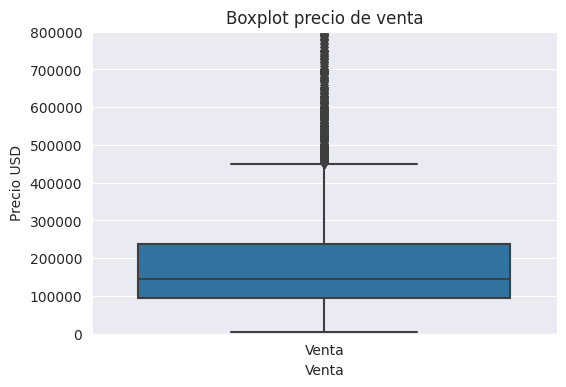

In [50]:
plt.figure(dpi=100)
sns_boxplot_price=sns.boxplot(x="operation",y="property_price", data=df_seleccion)
sns_boxplot_price=sns_boxplot_price.set(title="Boxplot precio de venta",xlabel='Venta',ylabel='Precio USD', ylim=(0, 800000))

### Título del anuncio

In [51]:
print('Cantidad de elementos nulos = ', df_seleccion['property_title'].isnull().sum())

Cantidad de elementos nulos =  0


In [52]:
df_seleccion['property_title'].value_counts().head(60)

Departamento - Palermo                             1468
Departamento - Recoleta                            1324
Departamento - Belgrano                            1113
Departamento - Caballito                            936
Departamento - Almagro                              666
Departamento - Villa Urquiza                        634
Departamento - Barrio Norte                         619
Departamento - Villa Crespo                         487
Departamento - Flores                               433
Departamento - Nuñez                                427
Departamento - Balvanera                            370
Departamento venta                                  369
Departamento - Puerto Madero                        330
Departamento - Palermo Hollywood                    316
Departamento - San Telmo                            288
Departamento - Las Cañitas                          286
Departamento - Colegiales                           275
Departamento - Almagro Norte                    

In [53]:
df_seleccion['property_title'].value_counts().tail(10)

VENTA TRIPLEX SAAVEDRA COCHERA/TERRAZA/BAULERA                                        1
Venta de dpto. monoambiente dividido en Balvanera                                     1
VENTA DPTO 2 AMB NUEVO C/ COCHERA V. URQUIZA                                          1
IMPECABLE DEPTO CON PISCINA JACUZZI Y TERRAZA PROPIA - Puerto Madero                  1
Venta Departamento 4 Ambientes- Recoleta                                              1
3 ambientes a estrenar en Torre premium en Caballito. Amenities. Cochera opcional.    1
VENTA TRES AMBIENTES LA BOCA PISO ALTO                                                1
6 amb. 5 dormitorios. Frente. Balcón. Subte "A"                                       1
Venta Departamento 4 ambientes en La Isla                                             1
Venta |  4 ambientes | Luminoso | Dependencia | Cochera | Barrio Norte                1
Name: property_title, dtype: int64

In [54]:
df_title = df_seleccion.groupby('property_title').filter(lambda x : len(x)>200)

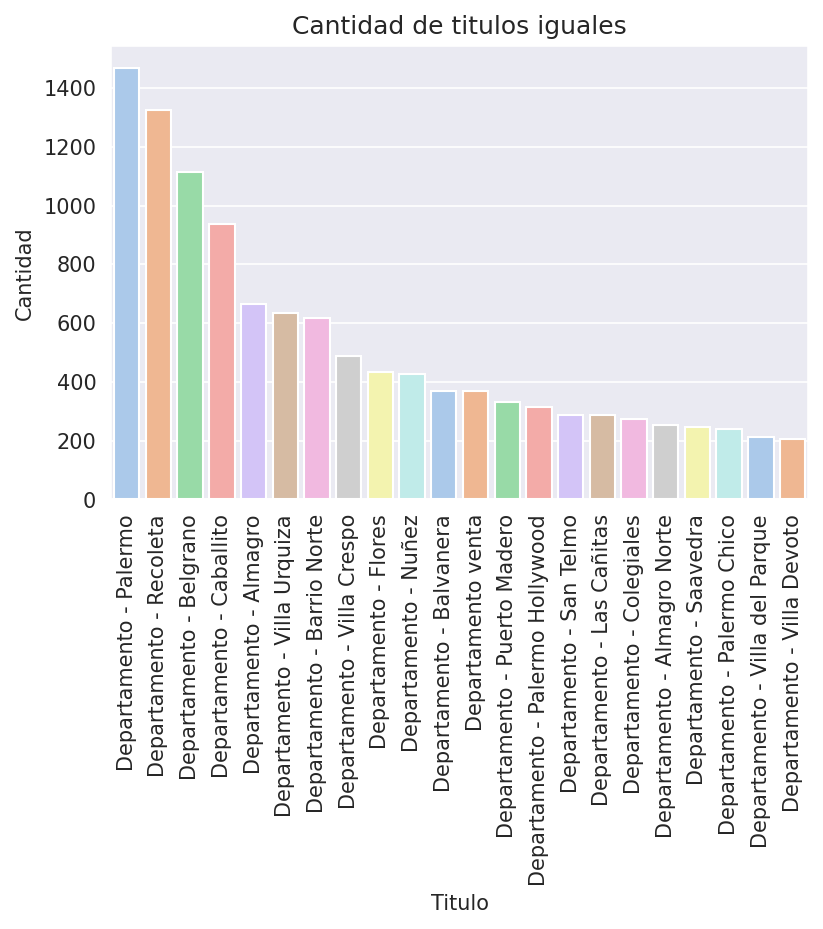

In [55]:
plt.figure(dpi=150)
colors = sns.color_palette('pastel')
sns.countplot(x= 'property_title', data=df_title, palette=colors, order=df_title.property_title.value_counts().index)
plt.ylabel("Cantidad")
plt.xlabel("Titulo")
plt.xticks(rotation=90)
plt.title("Cantidad de titulos iguales")
plt.show()

In [56]:
df_t = df_seleccion["property_title"].str.split('-', expand=True)
df_t.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
25,VENTA CASA LLAVE EN MANO,COSTA ESMERALDA,None,None,None,None,None,None,None,None,None,None,None,None,None,None
42,VENTA TRES AMBIENTES LA BOCA PISO ALTO,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
43,Departamento,4 Ambientes,Catalinas Sur,None,None,None,None,None,None,None,None,None,None,None,None,None
49,Venta departamento 4 ambientes Once,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
51,PH,Boedo,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [57]:
df_t = df_t[[0,1]]
df_t.columns = ['Tipo', 'Barrio']
df_t

,Tipo,Barrio
25,VENTA CASA LLAVE EN MANO,COSTA ESMERALDA
42,VENTA TRES AMBIENTES LA BOCA PISO ALTO,None
43,Departamento,4 Ambientes
49,Venta departamento 4 ambientes Once,None
51,PH,Boedo
...,...,...
460072,Espectacular 4 amb130m2 con Balcon Terraza!!!,None
460073,3 ambientes con cochera listo para habitar!,None
460074,VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA ///...,None
460075,VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF ...,None


In [58]:
df_t = df_t.loc[(df_t['Tipo']=='Casa') | (df_t['Tipo']=='PH') | (df_t['Tipo']=='Departamento')]
df_t.head(10)

,Tipo,Barrio
8234,PH,Triplex tipo casa con cochera y jardin!
18513,Casa,Saavedra
18571,Casa,venta
26165,PH,"Entorno Parque Saavedra, Av Cramer y Av Balbin"
34653,PH,Venta
34765,PH,MONO
46794,Departamento,Belgrano 2Ambientes P.B. a mts Subte Apto prof...
51501,PH,4 AMBIENTES
54886,Departamento,None
64241,PH,CASA


In [ ]:
#df_t['Barrio'].value_counts()

# Correlaciones

In [59]:
import numpy as np

### Correlaciones en dataset completo

In [60]:
df_corr = df[['operation','property_type']].copy()
df_corr.head(5)

,operation,property_type
0,Venta,Casa
1,Venta,Casa
2,Venta,Casa
3,Venta,Casa
4,Venta,PH


+ Como son variables categoricas, aplico One Hot Encoding

In [61]:
df_dummies = pd.get_dummies(df_corr, columns=['operation', 'property_type'], 
                              drop_first=False, dummy_na=False)
df_dummies.tail()

,operation_Alquiler,operation_Alquiler temporal,operation_Venta,property_type_Casa,property_type_Casa de campo,property_type_Cochera,property_type_Departamento,property_type_Depósito,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
460149,0,0,1,0,0,0,0,0,1,0,0,0,0
460150,0,0,1,0,0,0,0,0,1,0,0,0,0
460151,0,0,1,0,0,0,0,0,1,0,0,0,0
460152,1,0,0,0,0,0,0,0,1,0,0,0,0
460153,0,0,1,0,0,0,0,0,1,0,0,0,0


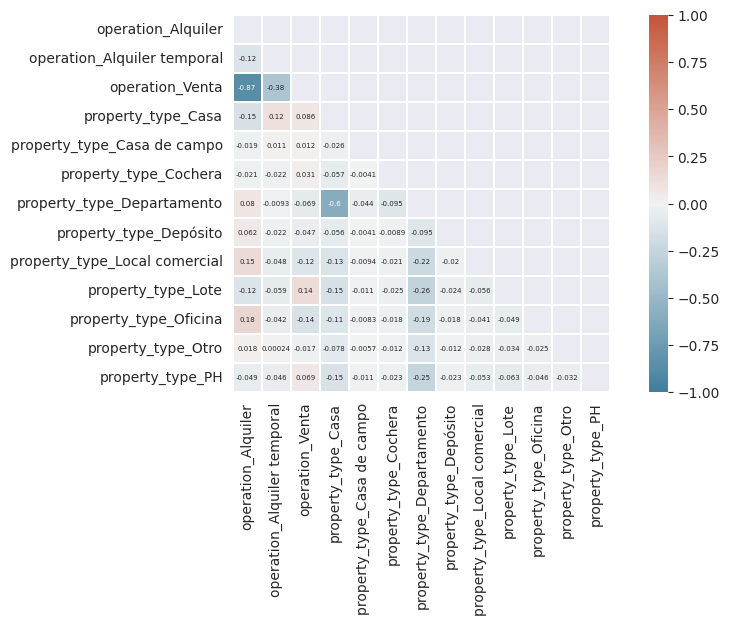

In [62]:
corr = df_dummies.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(dpi=100, figsize=(10, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, square=True, linewidths=.5, annot=True, annot_kws={"size":5})
plt.xticks(rotation=90)
plt.show()

In [63]:
df_corr = df[['operation','property_currency']].copy()
df_corr.head(5)

,operation,property_currency
0,Venta,NaN
1,Venta,USD
2,Venta,USD
3,Venta,USD
4,Venta,USD


In [64]:
df_dummies = pd.get_dummies(df_corr, columns=['operation', 'property_currency'], 
                              drop_first=False, dummy_na=False)
df_dummies.tail()

,operation_Alquiler,operation_Alquiler temporal,operation_Venta,property_currency_ARS,property_currency_COP,property_currency_PEN,property_currency_USD,property_currency_UYU
460149,0,0,1,0,0,0,1,0
460150,0,0,1,0,0,0,1,0
460151,0,0,1,0,0,0,1,0
460152,1,0,0,0,0,0,0,0
460153,0,0,1,0,0,0,1,0


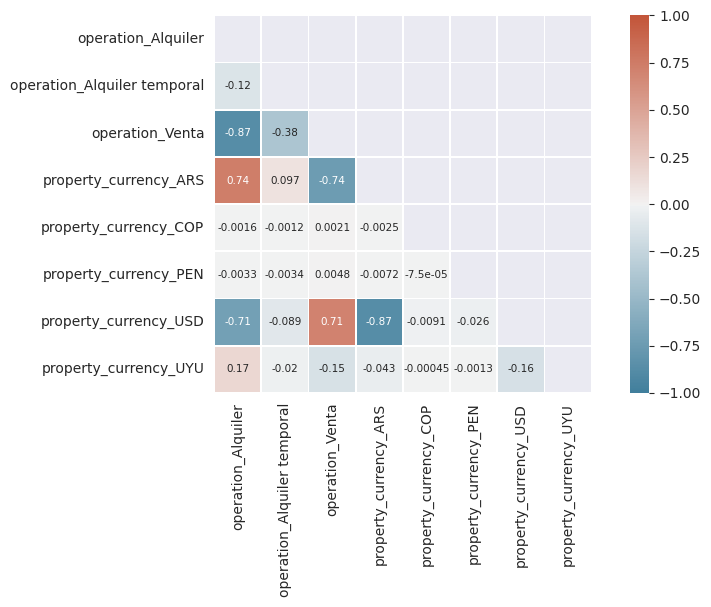

In [65]:
corr = df_dummies.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(dpi=100, figsize=(10, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, square=True, linewidths=.5, annot=True, annot_kws={"size":7.5})
plt.xticks(rotation=90)
plt.show()

Hay una alta correlacion entre:
+ operacion venta y moneda dolar
+ operacion alquiler y moneda pesos argentinos

In [66]:
df_corr = df[['property_type','property_currency']].copy()
df_corr.head(5)

,property_type,property_currency
0,Casa,NaN
1,Casa,USD
2,Casa,USD
3,Casa,USD
4,PH,USD


In [67]:
df_dummies = pd.get_dummies(df_corr, columns=['property_type', 'property_currency'], 
                              drop_first=False, dummy_na=False)
df_dummies.tail()

,property_type_Casa,property_type_Casa de campo,property_type_Cochera,property_type_Departamento,property_type_Depósito,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH,property_currency_ARS,property_currency_COP,property_currency_PEN,property_currency_USD,property_currency_UYU
460149,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
460150,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
460151,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
460152,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
460153,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


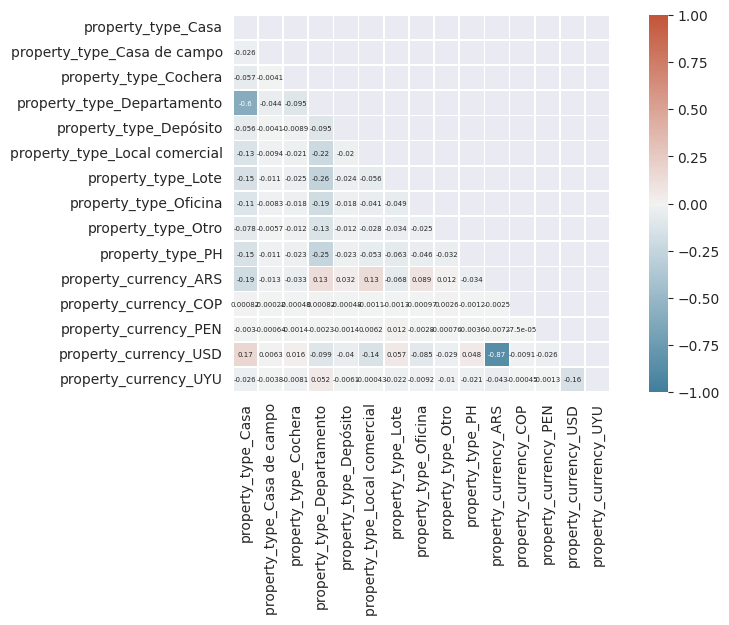

In [68]:
corr = df_dummies.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(dpi=100, figsize=(10, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, square=True, linewidths=.5, annot=True, annot_kws={"size":5})
plt.xticks(rotation=90)
plt.show()

# Faltantes

<h4 align="center"><b> Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable
el porcentaje de datos faltantes con respecto al total del dataset </b></h4>

**b) Datos Faltantes:** analizar la presencia de datos faltantes en el dataset
* Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable
el porcentaje de datos faltantes con respecto al total del dataset
* Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de
datos faltantes de cada registro. Realizar un gráfico que permita conocer la
proporción de faltantes por fila en el dataset.
* Determinar, de ser posible, estrategias para reparar los valores faltantes.
* En caso de realizar imputaciones comparar las distribuciones de cada atributo
reparado con la distribución anterior a la imputación de los datos faltantes.

In [69]:
na_ratio_column = pd.DataFrame()
na_ratio_column["Percent"] = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
na_ratio_column["Count"] =(df.isnull().sum()).sort_values(ascending = False)

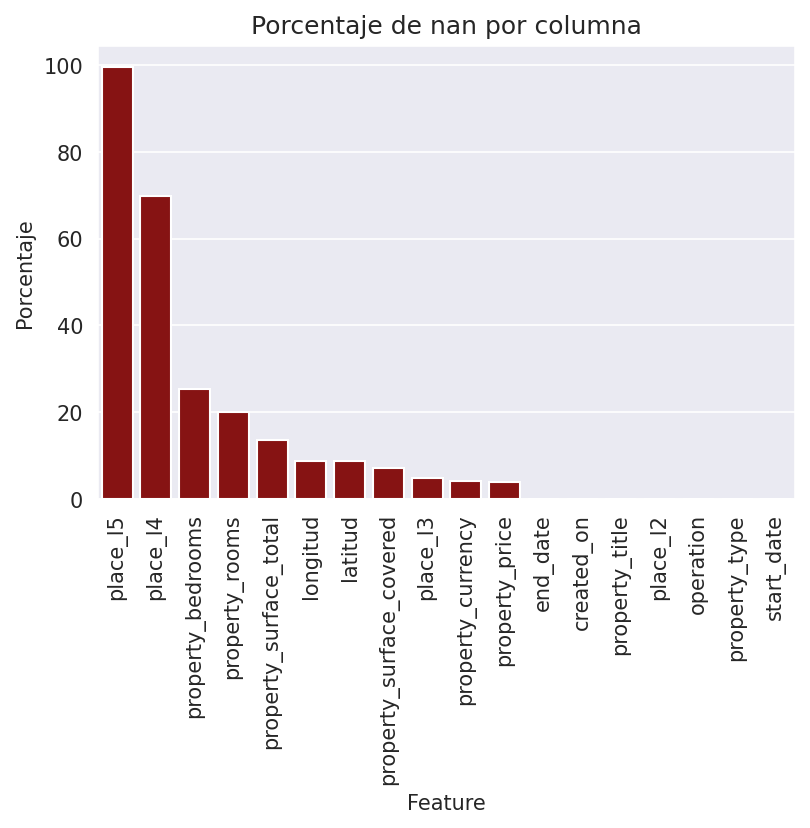

In [70]:
eje_x = na_ratio_column.index
eje_y = list(na_ratio_column['Percent'])

plt.figure(dpi=150)
sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, color=(0.6, 0, 0), alpha = 1)
plt.ylabel("Porcentaje")
plt.xlabel("Feature")
plt.title("Porcentaje de nan por columna")
plt.xticks(rotation=90)
plt.show()

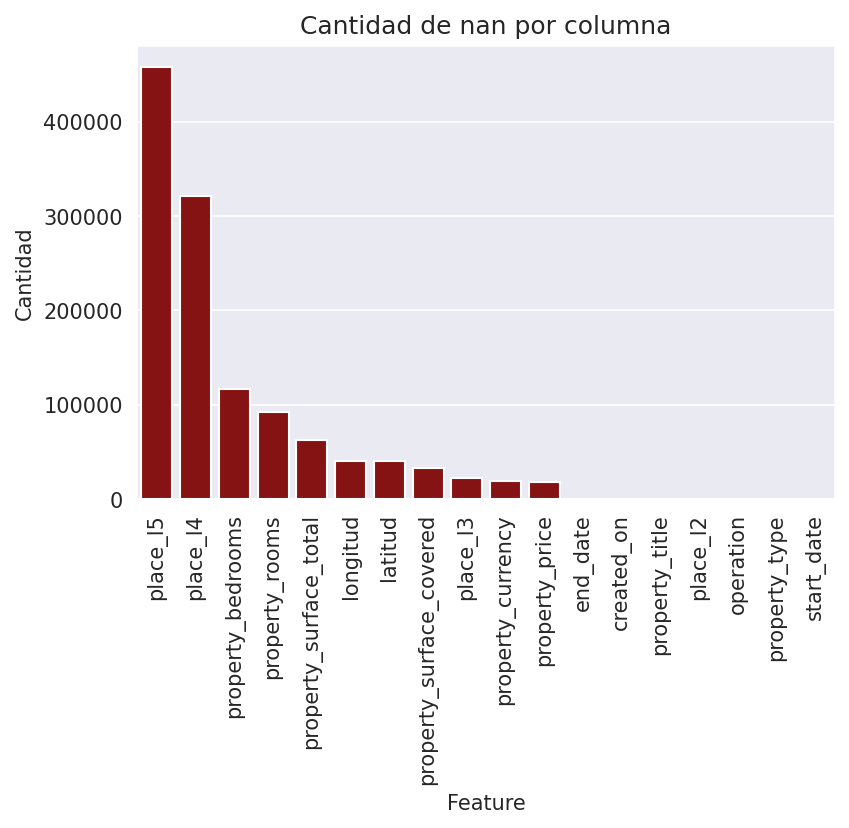

In [71]:
eje_x = na_ratio_column.index
eje_y = list(na_ratio_column['Count'])

plt.figure(dpi=150)
sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, color=(0.6, 0, 0), alpha = 1)
plt.ylabel("Cantidad")
plt.xlabel("Feature")
plt.title("Cantidad de nan por columna")
plt.xticks(rotation=90)
plt.show()

<h4 align="center"><b> Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de datos faltantes de cada registro. Realizar un gráfico que permita conocer la proporción de faltantes por fila en el dataset </b></h4>

In [72]:
na_ratio_row = pd.DataFrame()
n_column = df.shape[1]
na_ratio_row["Percent"] = df.isnull().sum(axis=1) / n_column
na_ratio_row["Count"] = df.isnull().sum(axis=1)

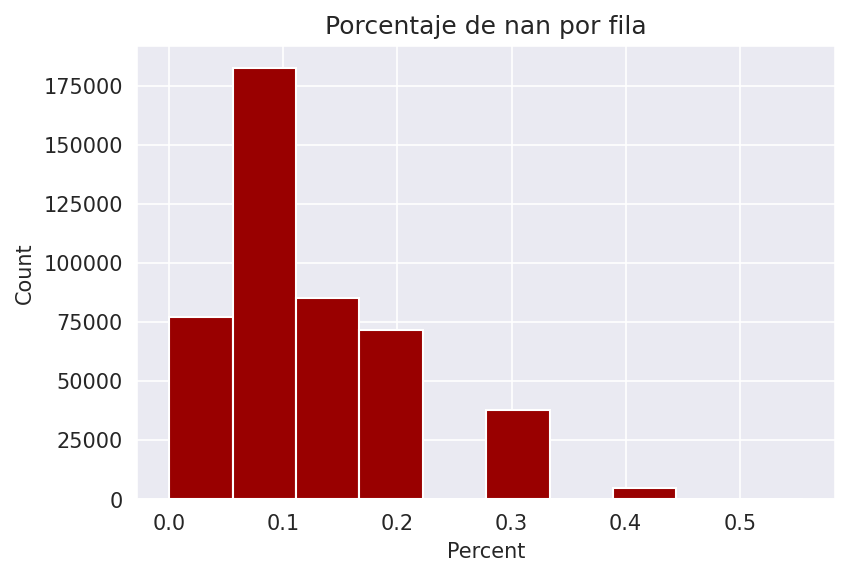

In [73]:
plt.figure(dpi=150)
sns.histplot(data=na_ratio_row, x="Percent", bins=10, color=(0.6, 0, 0), alpha = 1)
plt.title("Porcentaje de nan por fila")
plt.show()

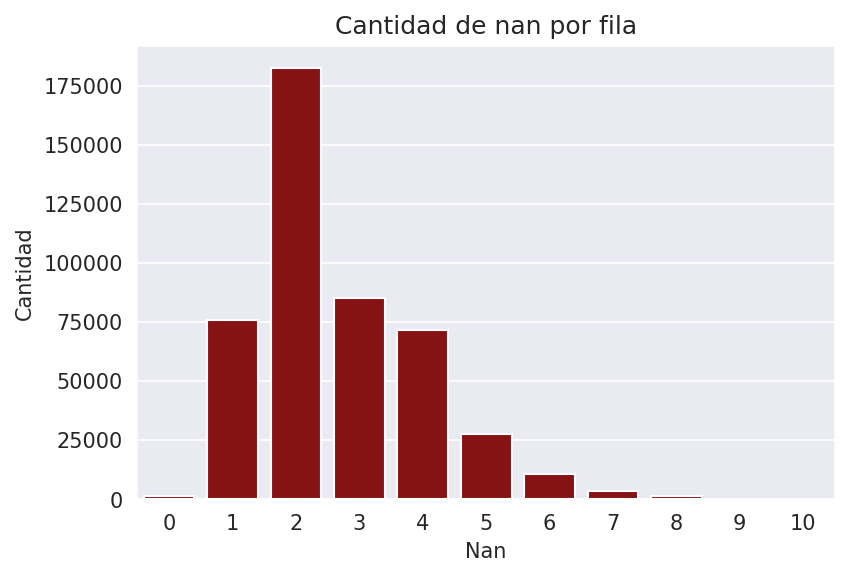

In [74]:
plt.figure(dpi=150)
sns.countplot(
    x="Count", data=na_ratio_row, color=(0.6, 0, 0), alpha = 1
)
plt.ylabel("Cantidad")
plt.xlabel("Nan")
plt.title("Cantidad de nan por fila")
plt.show()

<h4 align="center"><b> Determinar, de ser posible, estrategias para reparar los valores faltantes </b></h4>

In [ ]:
# Codigo

<h4 align="center"><b> En caso de realizar imputaciones comparar las distribuciones de cada atributo
reparado con la distribución anterior a la imputación de los datos faltantes </b></h4>

In [ ]:
# Codigo

<img src="https://www.infobae.com/new-resizer/6Z2ub_JTNhj8x69p5MHcSV8vwVo=/1200x628/filters:format(webp):quality(85)//s3.amazonaws.com/arc-wordpress-client-uploads/infobae-wp/wp-content/uploads/2017/05/12115047/homero-simpson-1920.jpg">

**c) Valores atípicos:** analizar la existencia de valores atípicos
* Detectar valores atípicos en los datos tanto en forma univariada como
multivariada. Realizar gráficos que permitan visualizar los valores atípicos.
* Explicar qué características poseen los datos atípicos detectados.
* Decidir el tratamiento a aplicar sobre los mismos.
* Analizar la relación entre el precio de venta y los metros de superficie ¿hay
valores atípicos que no se detectaron previamente?

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**d) Reducción de la dimensionalidad:** en este punto se pide crear un nuevo dataset que
resulte de aplicar una reducción de dimensionalidad sobre el dataset que se obtuvo al
finalizar el preprocesamiento.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**Nota:** Los ítems a, b, c y d son los mínimos requeridos para esta etapa, cada grupo puede crear
nuevas variables que resulten derivadas de los atributos existentes o que resulten de incorporar
nuevas fuentes de datos.

### **2. Agrupamiento**
En este punto se busca analizar si es posible agrupar los datos en función de algún criterio. Para
esta tarea utilizar el algoritmo K-Means y se deberán realizar los siguientes puntos:
* Analizar la tendencia al *clustering* del dataset.
* Estimar la cantidad apropiada de grupos que se deben formar.
* Evaluar la calidad de los grupos formados realizando un análisis de *Silhouette*.
* Realizar un análisis de cada grupo intentando entender en función de qué
características fueron formados.
* Graficar sobre un mapa de CABA los avisos coloreados según el grupo al que
pertenecen.
* Repetir el análisis anterior, utilizando sólo 3 grupos.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

### **3. Clasificación**

**a) Construcción del target**

Para esta tarea se debe crear una nueva variable ***tipo_precio*** que tendrá tres categorías:
**alto**, **medio**, **bajo**. Esta nueva variable será nuestra clase en el problema de clasificación.
Para determinar cuándo el tipo_precio de una propiedad es alto, medio o bajo se deberá
analizar el precio por metro cuadrado (pxm2). Se propone evaluar las siguientes
alternativas para establecer los límites de cada categoría:

1. Dividir la variable *pxm2* en 3 intervalos con igual cantidad de observaciones.
2. Dividir la variable pxm2 en 3 intervalos, el primero con el 25% de las observaciones,
el siguiente con el 50% y el último con el 25% de las observaciones restantes.
3. Trabajar la variable pxm2 relativa a cada tipo de propiedad y luego dividirla como en
el punto anterior.

Se pide:
* Mostrar la distribución del precio por metro cuadrado
* Mostrar la distribución del precio por metro cuadrado por tipo de propiedad
* Para cada una de las tres alternativas mostrar gráficamente la distribución de la
nueva variable creada *tipo_precio*.
* Seleccionar una de las alternativas, justificando la misma.
* Comparar, si aplica, la alternativa seleccionada con la división en 3 grupos obtenida
utilizando agrupamiento por K Means.
* Mostrar en un mapa de CABA los avisos coloreados por *tipo_precio*

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**b) Entrenamiento y Predicción**

Predecir el valor del atributo **tipo_precio**, excluyendo del entrenamiento la variable price,
**pxm2** y cualquier otra que pueda contener información del precio de venta. Para todos los
modelos se pide:
* Realizar las tareas de ingeniería de características necesarias para trabajar con
cada algoritmo (*encoding*, normalización, etc)
* Todos los modelos deben ser entrenados también con el *dataset* generado en el
punto **1 d)**


**Modelo 1 : Árbol de decisión**

a. Construir un árbol de decisión y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Graficar el árbol de decisión con mejor performance encontrado en el punto
anterior. Si es muy extenso mostrar una porción representativa.

c. Analizar el árbol de decisión seleccionado describiendo los atributos elegidos, y
decisiones evaluadas (explicar las primeras reglas obtenidas).

d. Evaluar la performance del árbol en el conjunto de evaluación, explicar todas las
métricas y mostrar la matriz de confusión. Comparar con la performance de
entrenamiento.


In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**Modelo 2: Random Forest**

a. Construir un clasificador RF y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Analizar la importancia de los atributos

c. Mostrar la conformación final de uno de los árboles generados. Si es muy
extenso mostrar una porción representativa y explicar las primeras reglas.

d. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas y mostrar la matriz de confusión. Comparar con la performance de
entrenamiento.


In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**Modelo 3: a elección**

a. En este punto se debe entrenar (mediante cross-validation) un modelo elegido
por el grupo. Se debe evaluar su performance en entrenamiento y sobre el
conjunto de evaluación, explicar todas las métricas y mostrar la matriz de
confusión.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

¿Qué modelo elegirían para clasificar el tipo de precio de las propiedades?

R:

### **4. Regresión**

En esta etapa se busca predecir el precio de la propiedad utilizando dos modelos diferentes.
Para todos los modelos se pide:

* Realizar las tareas de ingeniería de características necesarias para trabajar con
cada algoritmo (encoding, normalización, etc)
* Todos los modelos deben ser entrenados también con el dataset generado en el
punto **1 d)**

**Modelo 1: KNN**

a. Construir un modelo [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) para regresión y optimizar sus hiperparámetros
mediante *k-fold Cross Validation* para obtener la mejor performance .¿Cuántos
*folds* utilizaron? ¿Qué métrica consideran adecuada para buscar los parámetros?

b. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas. Comparar con la performance de entrenamiento.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**Modelo 2: XGBoost**

a. Construir un modelo **XGBoost** y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas. Comparar con la performance de entrenamiento.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**Modelo 3: a elección**

a. En este punto se debe entrenar (mediante *cross-validation*) un modelo elegido
por el grupo. Se debe evaluar su performance en entrenamiento y sobre el
conjunto de evaluación explicando todas las métricas.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

¿Qué modelo elegirían para predecir el precio de venta de las propiedades?

R:

### **5. Conclusiones**

Realizar las conclusiones correspondientes al trabajo realizado en su totalidad, destacando
principalmente los aspectos que consideren más relevantes. Comentar brevemente qué otras
opciones hubiesen explorado y quedaron fuera del alcance de este trabajo

R: